In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import numpy as np


In [13]:
img= image.load_img("/content/drive/MyDrive/Colab Notebooks/data/happy/100.jpg")

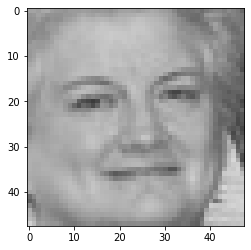

In [14]:
plt.imshow(img)

In [15]:
cv2.imread("/content/drive/MyDrive/Colab Notebooks/data/happy/100.jpg").shape

array([[[162, 162, 162],
        [163, 163, 163],
        [158, 158, 158],
        ...,
        [130, 130, 130],
        [122, 122, 122],
        [105, 105, 105]],

       [[148, 148, 148],
        [151, 151, 151],
        [161, 161, 161],
        ...,
        [131, 131, 131],
        [124, 124, 124],
        [120, 120, 120]],

       [[144, 144, 144],
        [146, 146, 146],
        [155, 155, 155],
        ...,
        [124, 124, 124],
        [124, 124, 124],
        [119, 119, 119]],

       ...,

       [[177, 177, 177],
        [157, 157, 157],
        [135, 135, 135],
        ...,
        [193, 193, 193],
        [197, 197, 197],
        [192, 192, 192]],

       [[186, 186, 186],
        [175, 175, 175],
        [144, 144, 144],
        ...,
        [199, 199, 199],
        [203, 203, 203],
        [201, 201, 201]],

       [[208, 208, 208],
        [187, 187, 187],
        [154, 154, 154],
        ...,
        [194, 194, 194],
        [192, 192, 192],
        [197, 197, 197]]

In [21]:
train=ImageDataGenerator(rescale=1/162)
validation= ImageDataGenerator(rescale=1/162)

In [52]:
train_dataset= train.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/data",
                                         target_size=(130,130),
                                         batch_size=50,
                                         class_mode="binary"
                                         )
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Colab Notebooks/valid",
                                                    target_size=(130,130),
                                                    batch_size=50,
                                                    class_mode='binary'
                                                    )


Found 357 images belonging to 2 classes.
Found 241 images belonging to 3 classes.


In [30]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(130,130,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [48]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


TypeError: ignored

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])


In [53]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=5,
                    epochs=20,
                    validation_data=validation_dataset
                    )

Epoch 1/20
5/5 [==============================] - 20s 5s/step - loss: 0.7097 - binary_accuracy: 0.5217 - false_negatives: 28.0000 - val_loss: 0.9251 - val_binary_accuracy: 0.0000e+00 - val_false_negatives: 241.0000
Epoch 2/20
5/5 [==============================] - 10s 2s/step - loss: 0.6816 - binary_accuracy: 0.5440 - false_negatives: 114.0000 - val_loss: 0.4746 - val_binary_accuracy: 0.6390 - val_false_negatives: 9.0000
Epoch 3/20
5/5 [==============================] - 4s 896ms/step - loss: 0.6692 - binary_accuracy: 0.5604 - false_negatives: 9.0000 - val_loss: 0.9034 - val_binary_accuracy: 0.0373 - val_false_negatives: 226.0000
Epoch 4/20
5/5 [==============================] - 5s 998ms/step - loss: 0.6537 - binary_accuracy: 0.6280 - false_negatives: 80.0000 - val_loss: 0.2495 - val_binary_accuracy: 0.6515 - val_false_negatives: 5.0000
Epoch 5/20
5/5 [==============================] - 4s 867ms/step - loss: 0.6440 - binary_accuracy: 0.6473 - false_negatives: 34.0000 - val_loss: 1.4131 -

In [62]:
validation_dataset.class_indices

{'fear': 0, 'happy': 1, 'sad': 2}

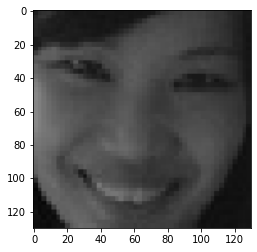

Depressed


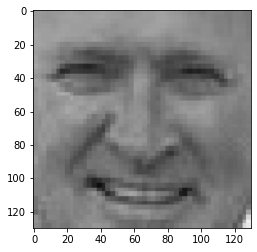

Depressed


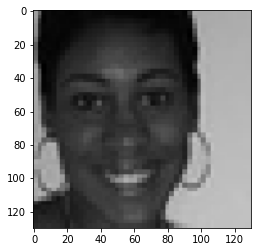

Depressed


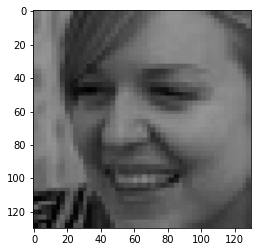

Depressed


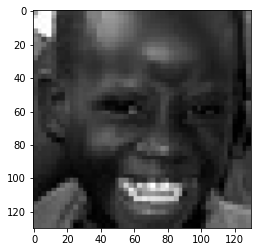

NOT depressed


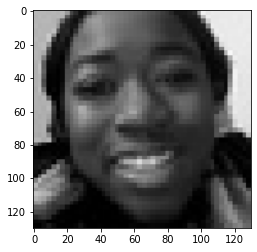

NOT depressed


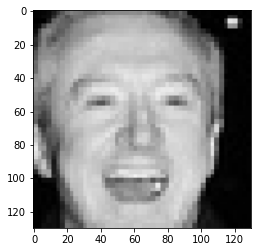

Depressed


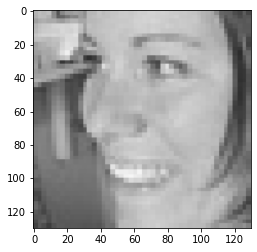

Depressed


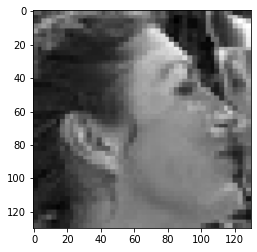

NOT depressed


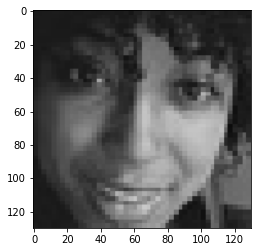

Depressed


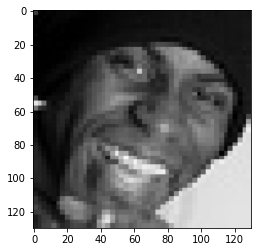

NOT depressed


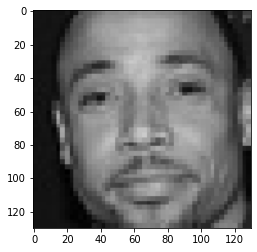

Depressed


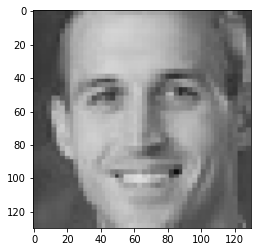

NOT depressed


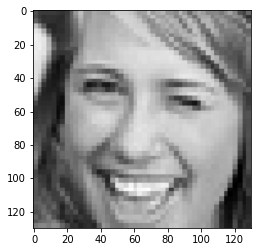

NOT depressed


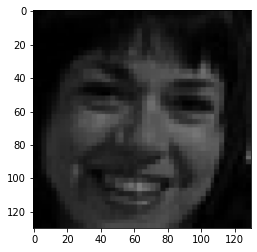

NOT depressed


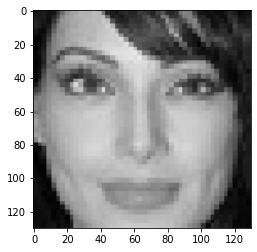

Depressed


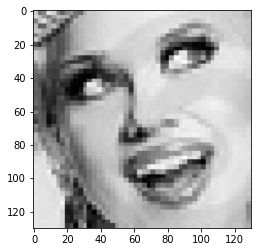

Depressed


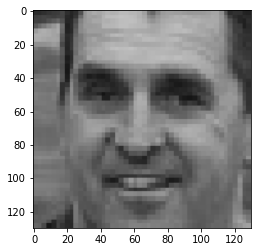

NOT depressed


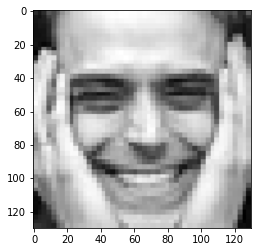

NOT depressed


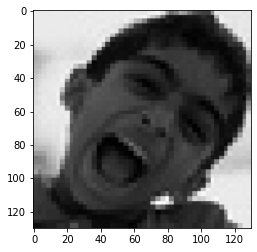

NOT depressed


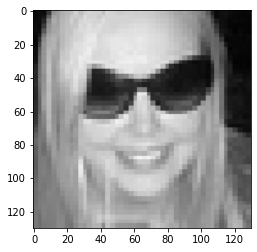

Depressed


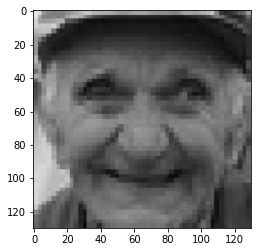

NOT depressed


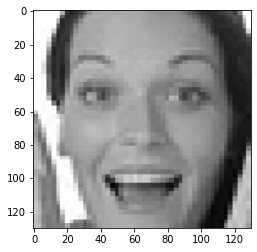

NOT depressed


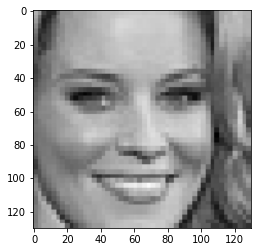

NOT depressed


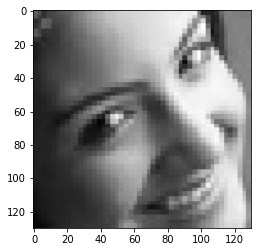

Depressed


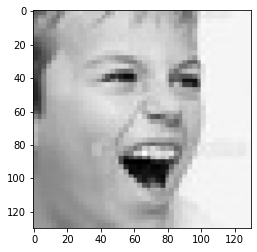

Depressed


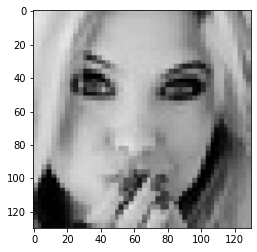

Depressed


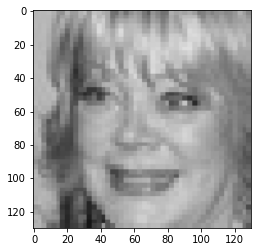

Depressed


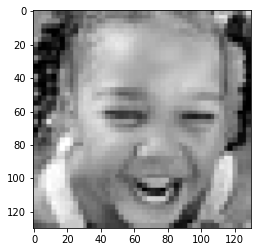

Depressed


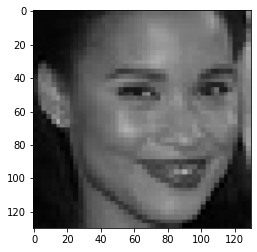

NOT depressed


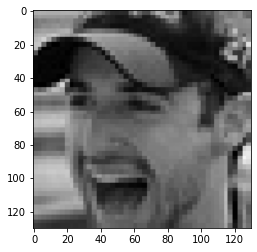

Depressed


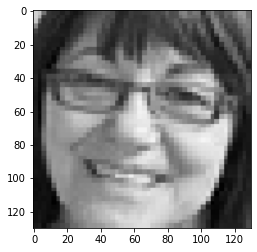

NOT depressed


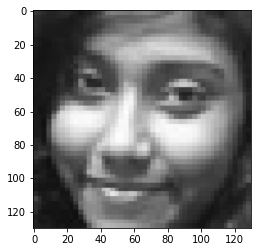

NOT depressed


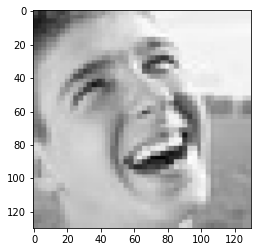

Depressed


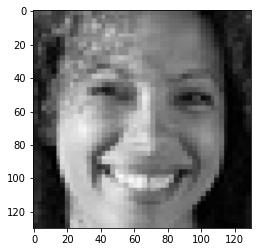

NOT depressed


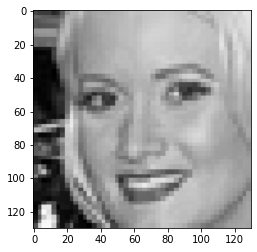

NOT depressed


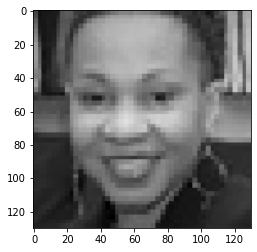

NOT depressed


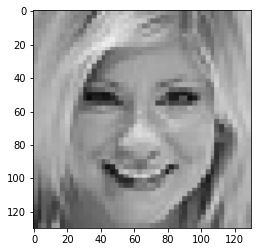

NOT depressed


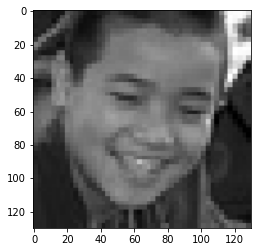

Depressed


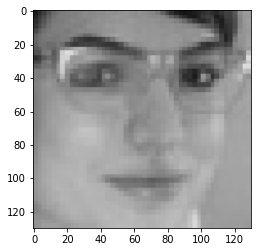

Depressed


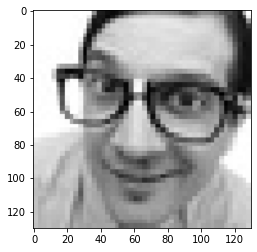

Depressed


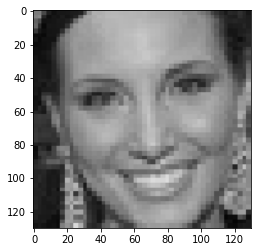

NOT depressed


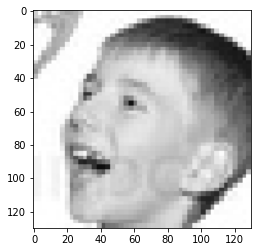

NOT depressed


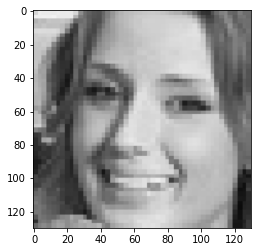

NOT depressed


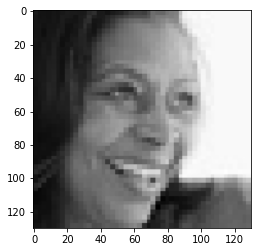

Depressed


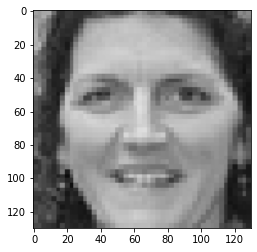

NOT depressed


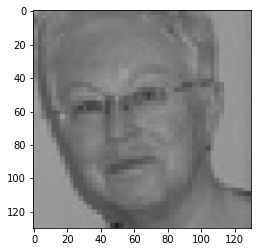

NOT depressed


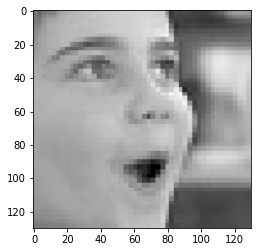

Depressed


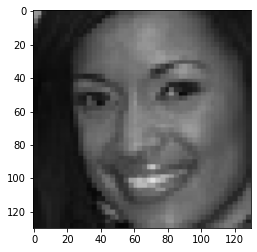

NOT depressed


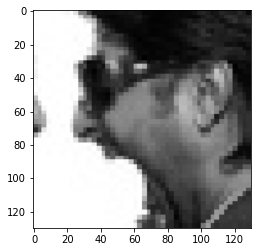

Depressed


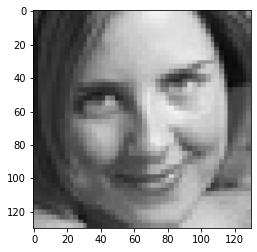

NOT depressed


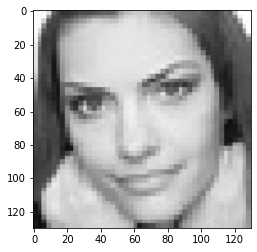

NOT depressed


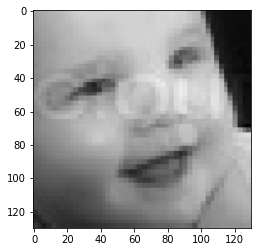

NOT depressed


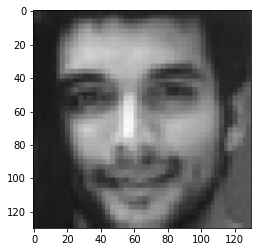

NOT depressed


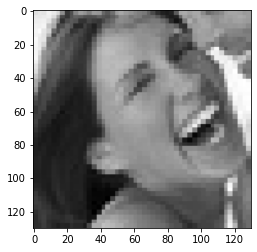

Depressed


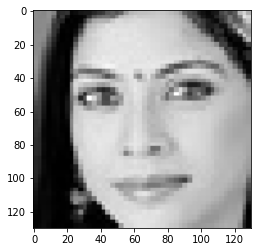

Depressed


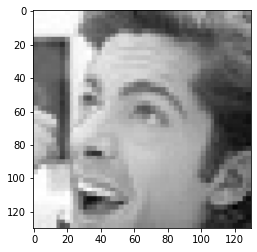

Depressed


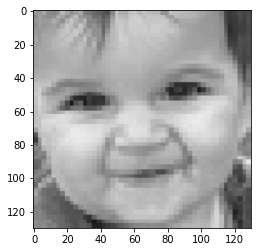

NOT depressed


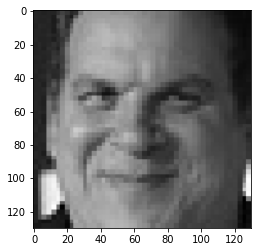

Depressed


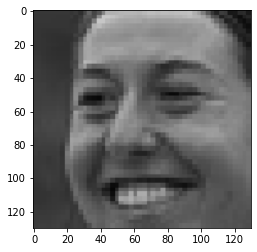

NOT depressed


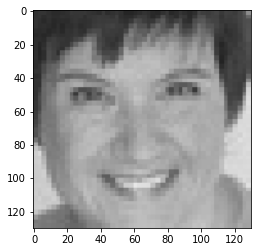

NOT depressed


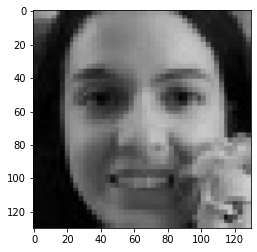

NOT depressed


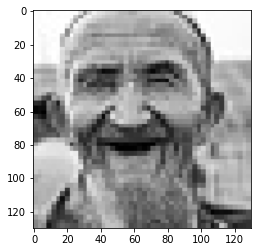

Depressed


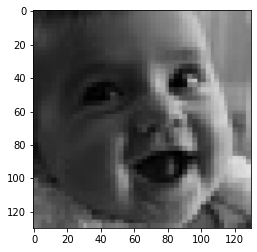

NOT depressed


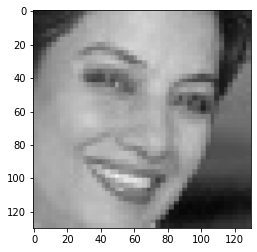

Depressed


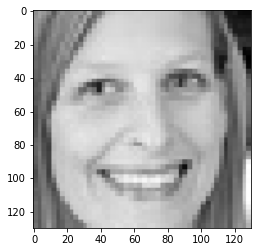

NOT depressed


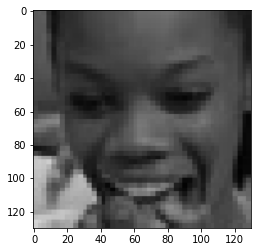

NOT depressed


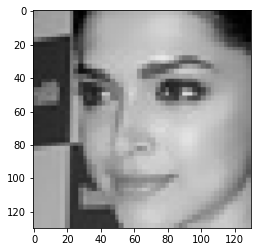

Depressed


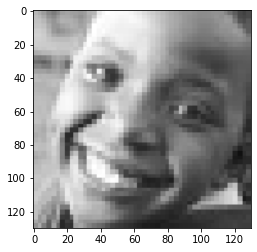

Depressed


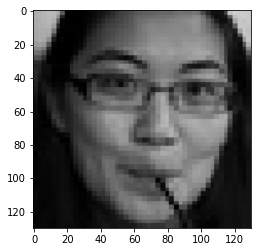

Depressed


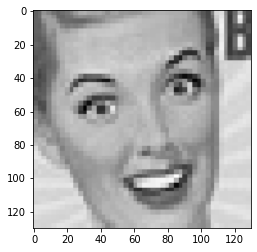

NOT depressed


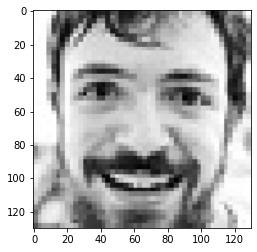

NOT depressed


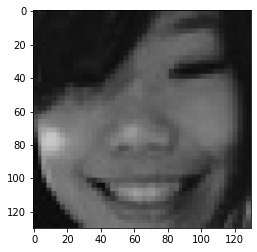

NOT depressed


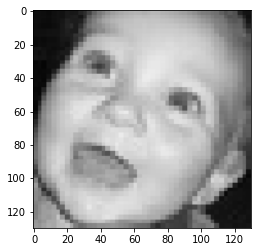

NOT depressed


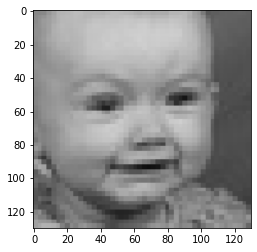

NOT depressed


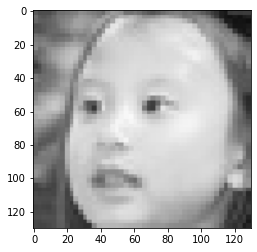

Depressed


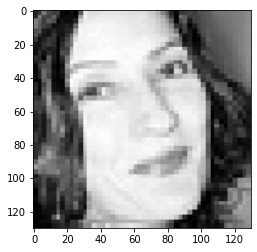

NOT depressed


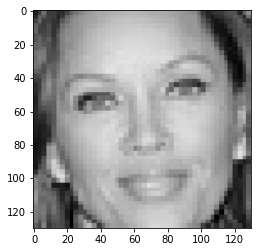

Depressed


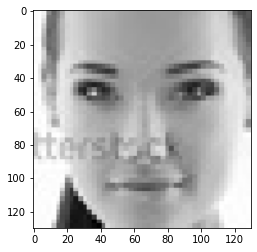

Depressed


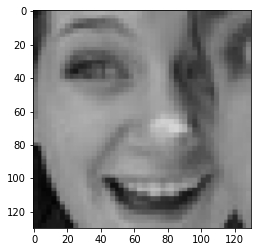

Depressed


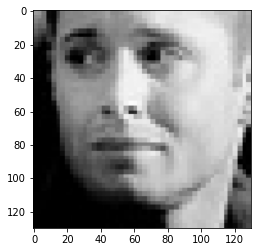

Depressed


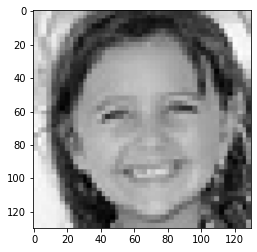

Depressed


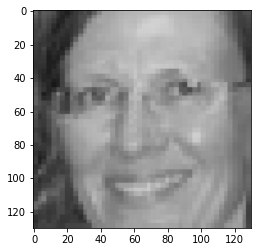

NOT depressed


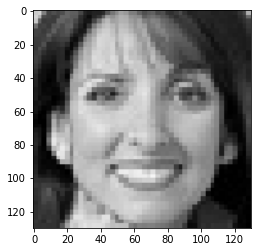

NOT depressed


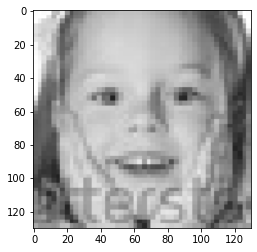

NOT depressed


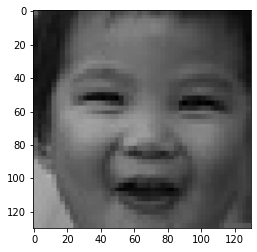

Depressed


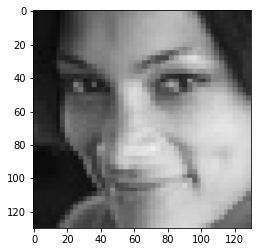

NOT depressed


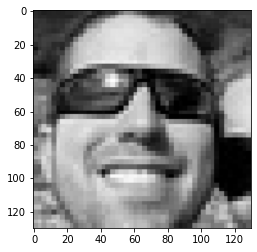

Depressed


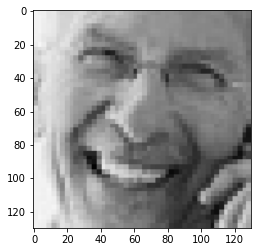

NOT depressed


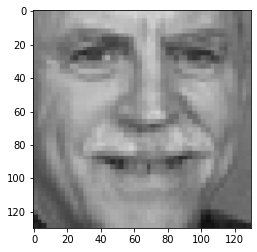

NOT depressed


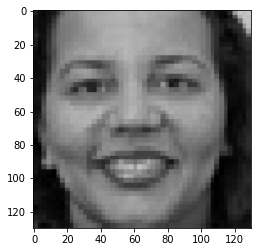

Depressed


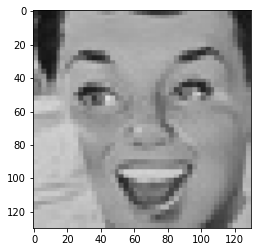

Depressed


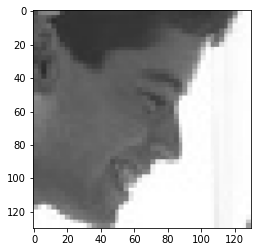

NOT depressed


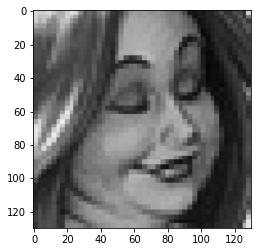

NOT depressed


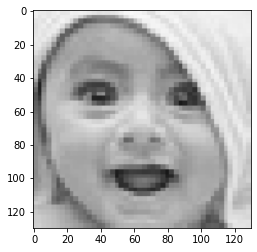

Depressed


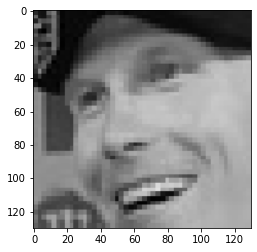

Depressed


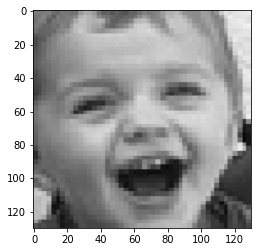

NOT depressed


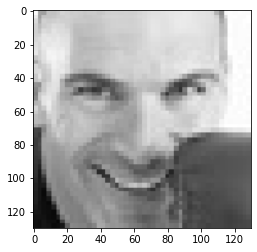

Depressed


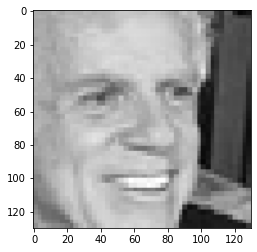

Depressed


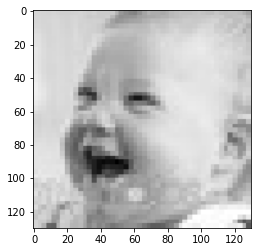

NOT depressed


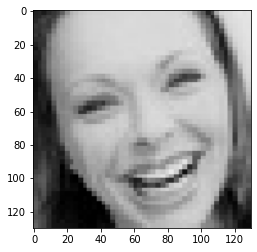

NOT depressed


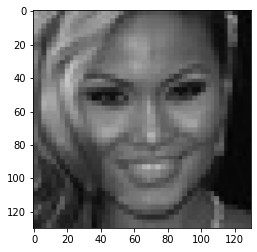

Depressed


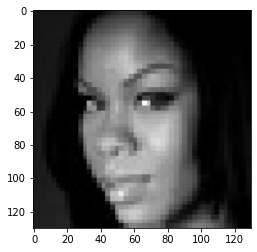

Depressed


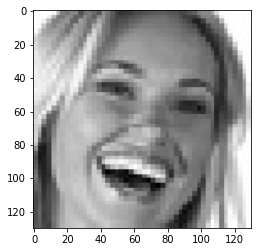

NOT depressed


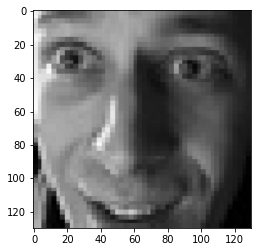

Depressed


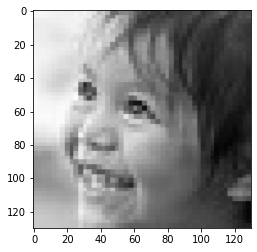

Depressed


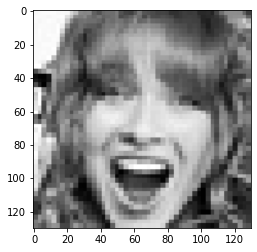

Depressed


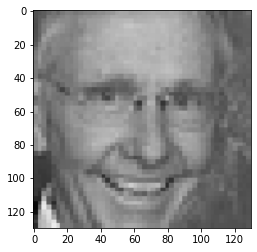

NOT depressed


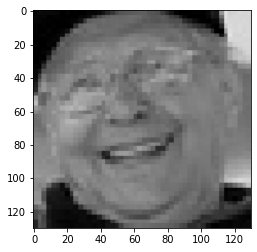

Depressed


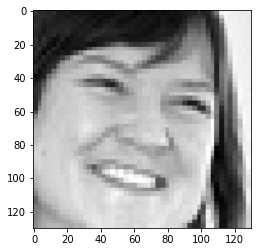

Depressed


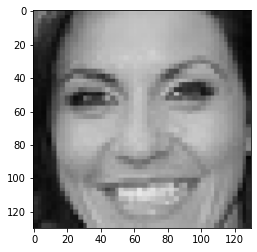

Depressed


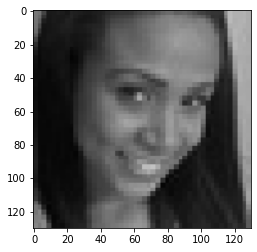

Depressed


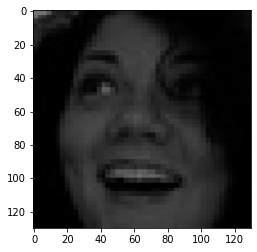

NOT depressed


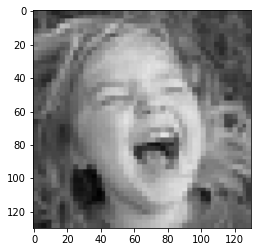

Depressed


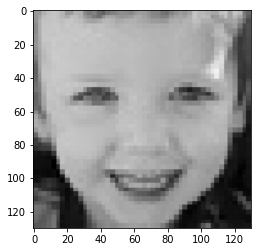

Depressed


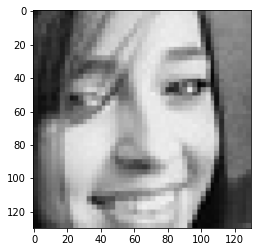

Depressed


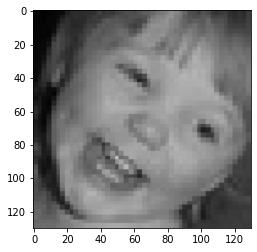

NOT depressed


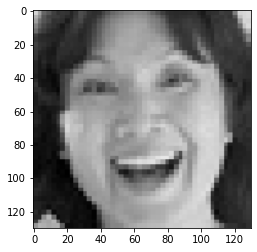

NOT depressed


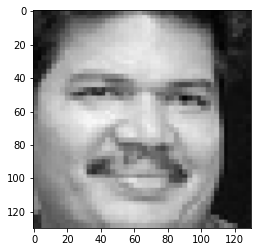

NOT depressed


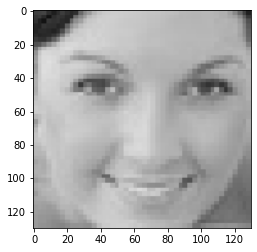

NOT depressed


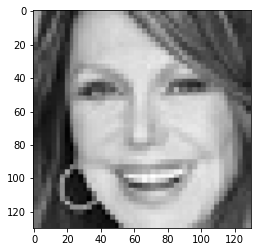

NOT depressed


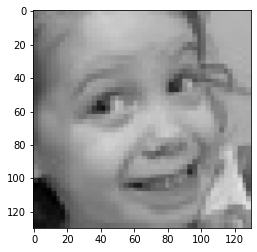

Depressed


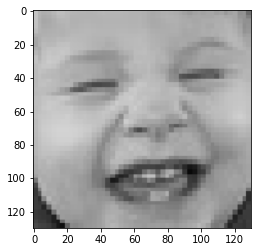

NOT depressed


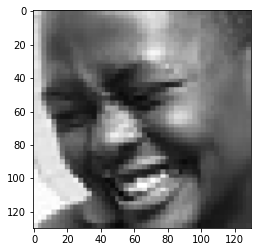

NOT depressed


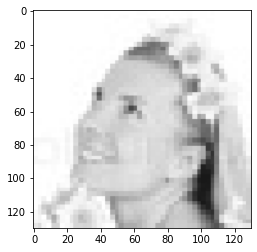

Depressed


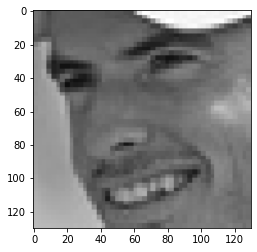

Depressed


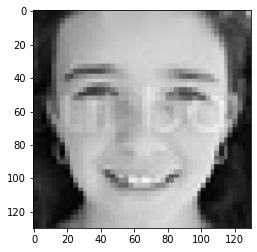

NOT depressed


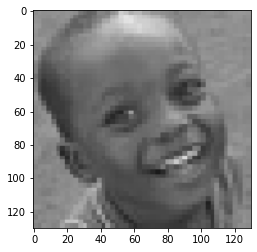

Depressed


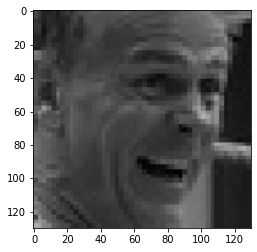

NOT depressed


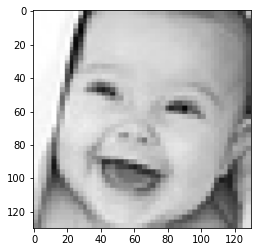

NOT depressed


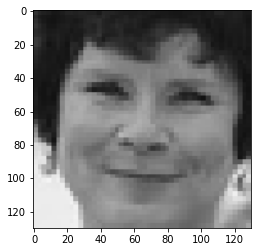

NOT depressed


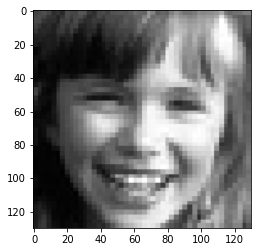

NOT depressed


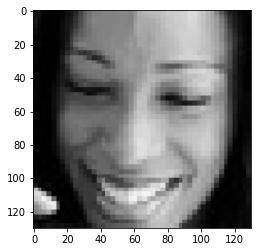

NOT depressed


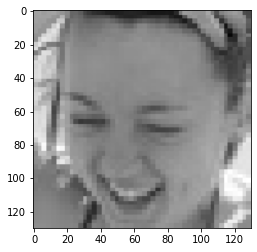

Depressed


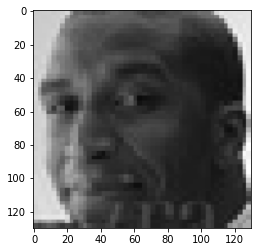

NOT depressed


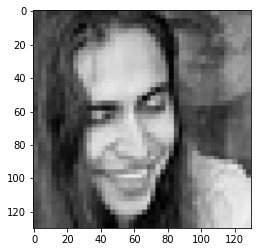

Depressed


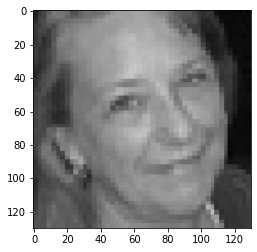

NOT depressed


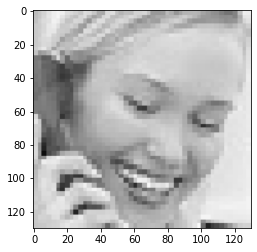

Depressed


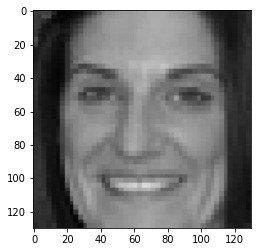

NOT depressed


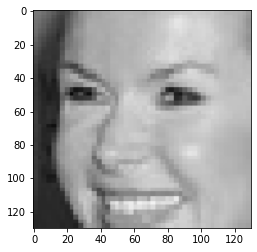

Depressed


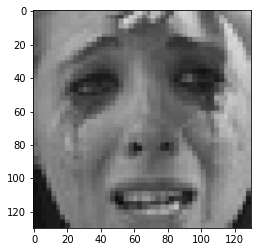

Depressed


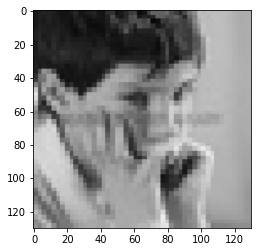

Depressed


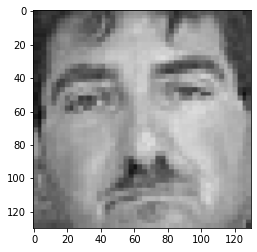

Depressed


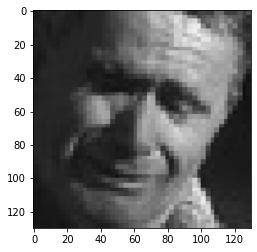

Depressed


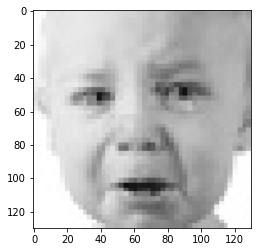

Depressed


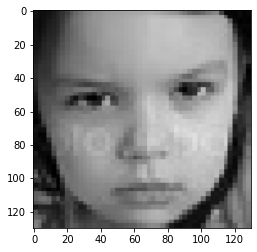

Depressed


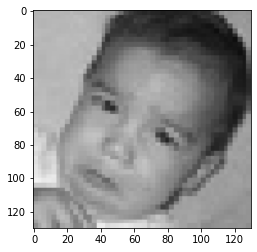

Depressed


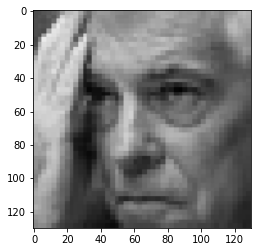

Depressed


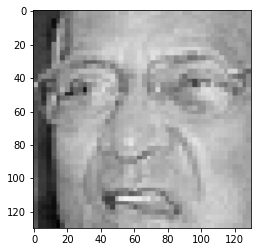

Depressed


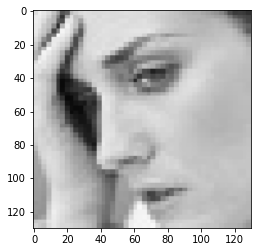

Depressed


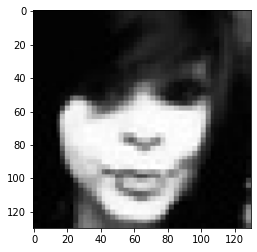

Depressed


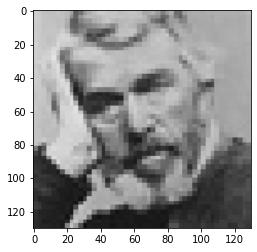

Depressed


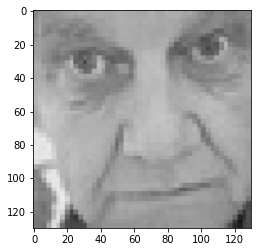

Depressed


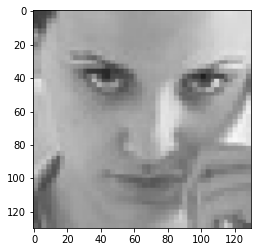

Depressed


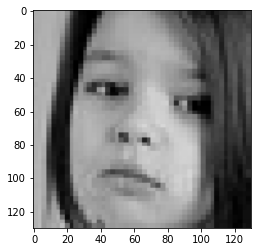

Depressed


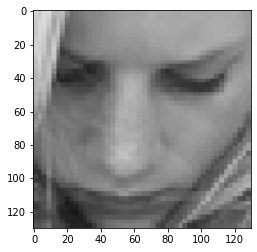

Depressed


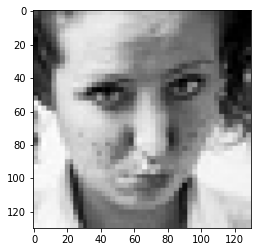

Depressed


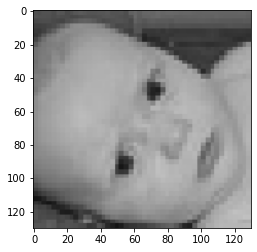

Depressed


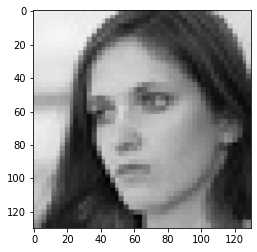

Depressed


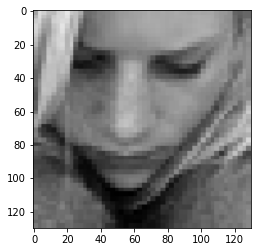

Depressed


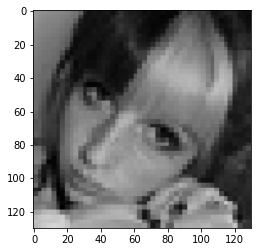

Depressed


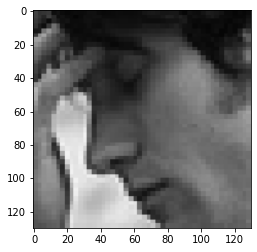

Depressed


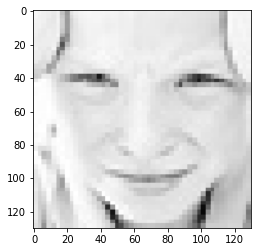

Depressed


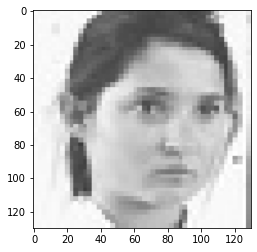

Depressed


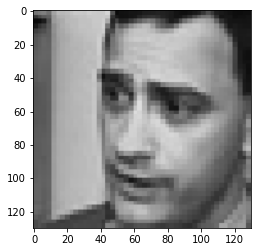

Depressed


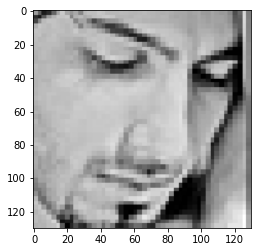

Depressed


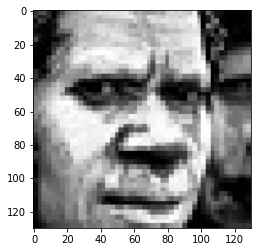

Depressed


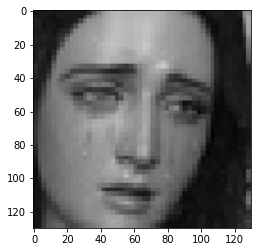

Depressed


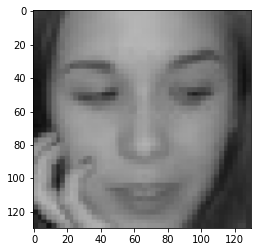

Depressed


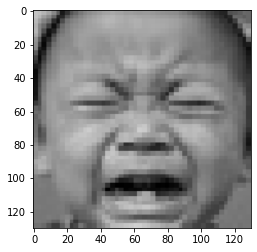

Depressed


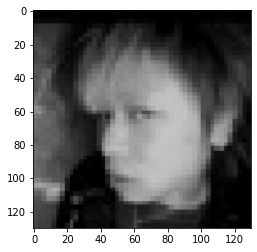

Depressed


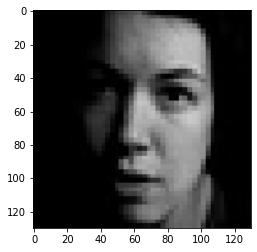

Depressed


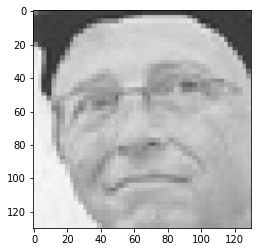

Depressed


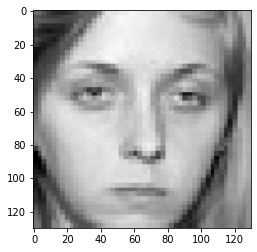

Depressed


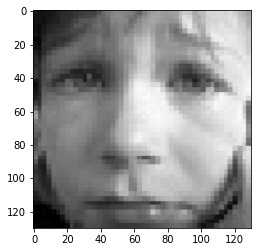

Depressed


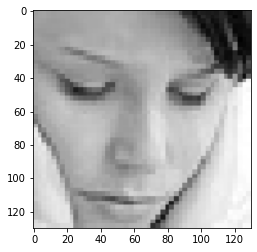

Depressed


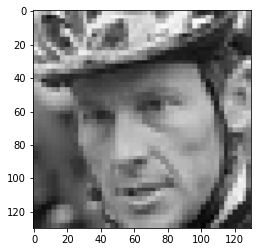

Depressed


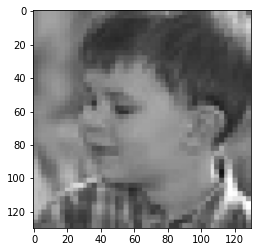

Depressed


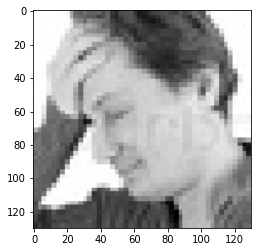

Depressed


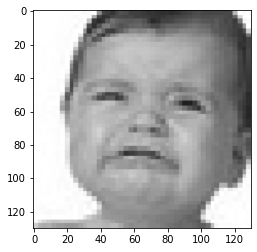

Depressed


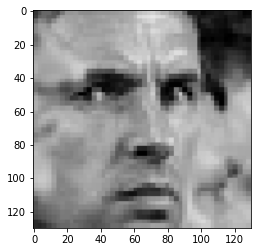

Depressed


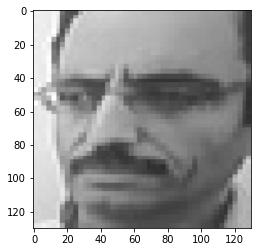

NOT depressed


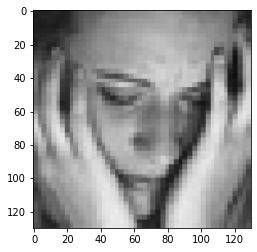

Depressed


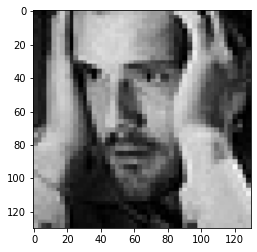

Depressed


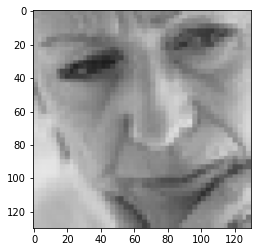

Depressed


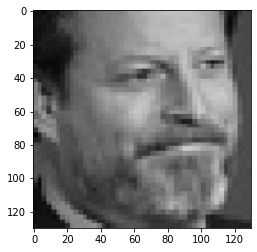

Depressed


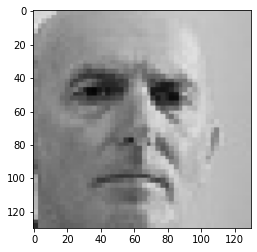

Depressed


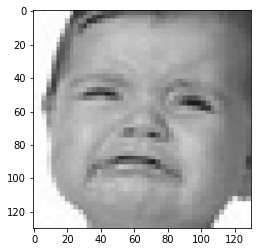

NOT depressed


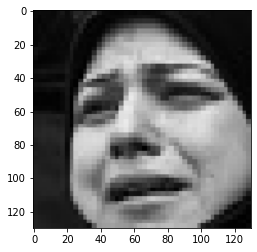

Depressed


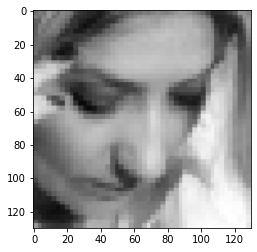

Depressed


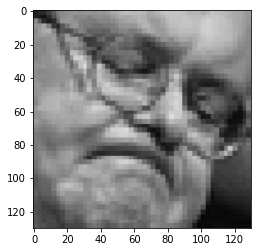

Depressed


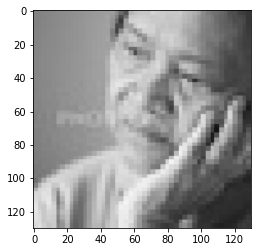

NOT depressed


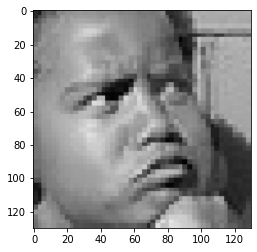

Depressed


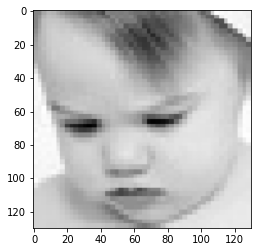

Depressed


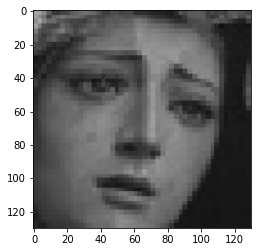

Depressed


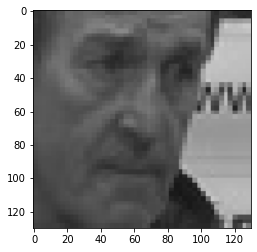

Depressed


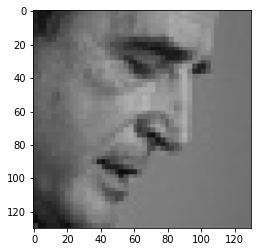

Depressed


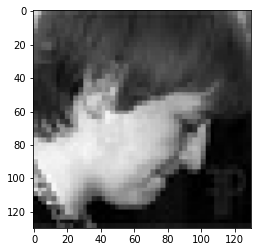

Depressed


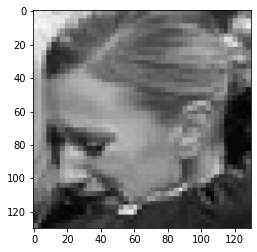

Depressed


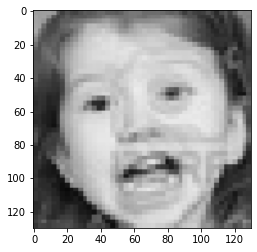

NOT depressed


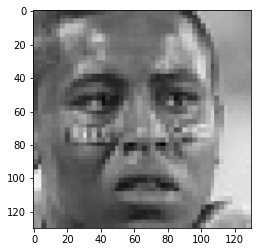

Depressed


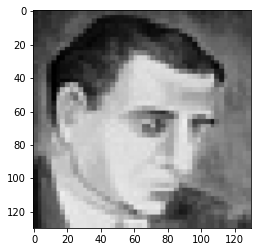

Depressed


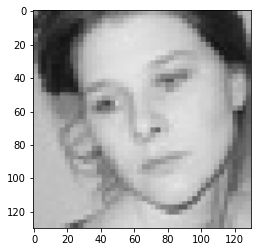

Depressed


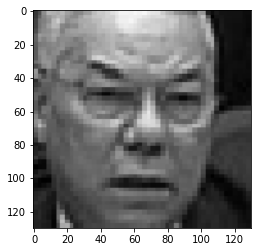

Depressed


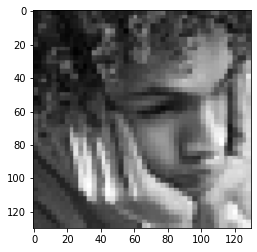

NOT depressed


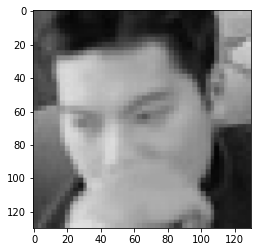

Depressed


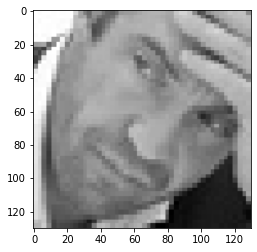

Depressed


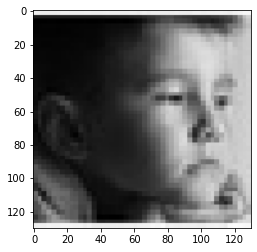

Depressed


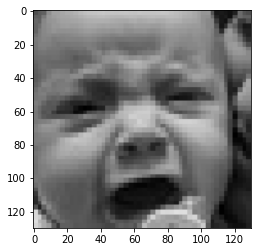

Depressed


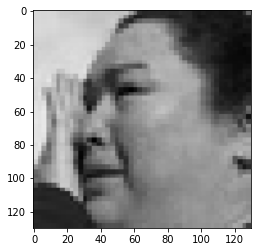

Depressed


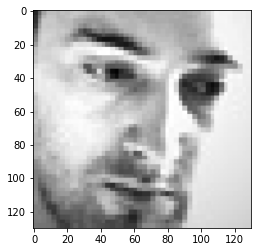

Depressed


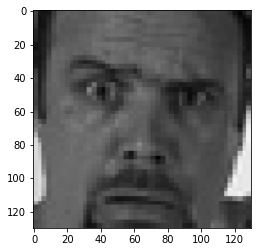

Depressed


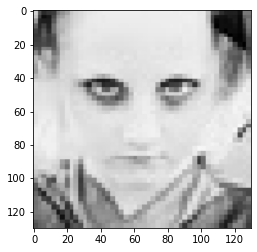

Depressed


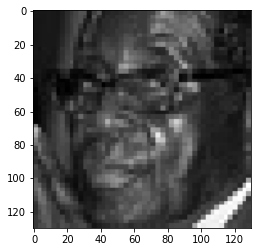

Depressed


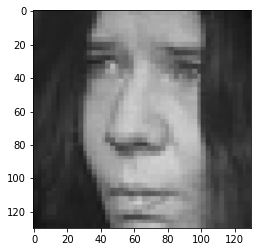

Depressed


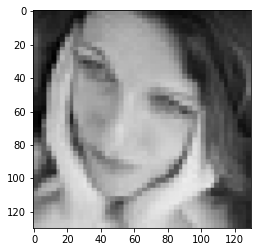

NOT depressed


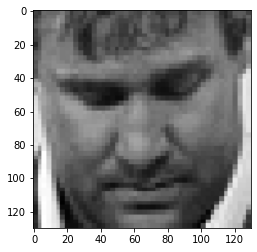

Depressed


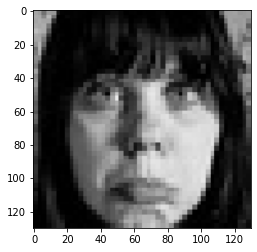

Depressed


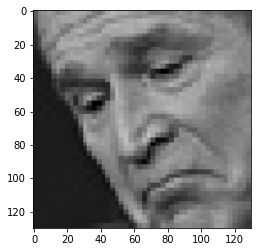

Depressed


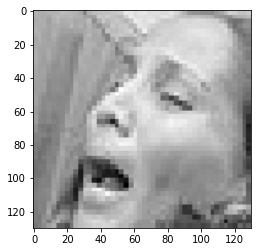

NOT depressed


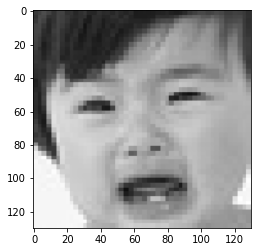

Depressed


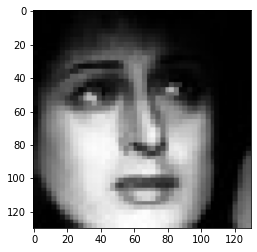

Depressed


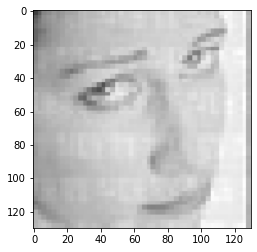

Depressed


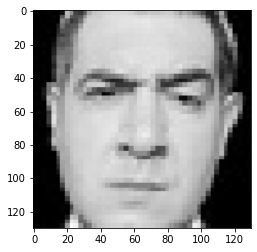

Depressed


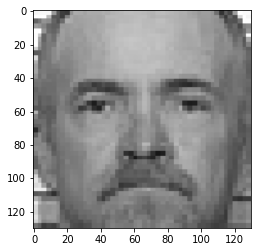

Depressed


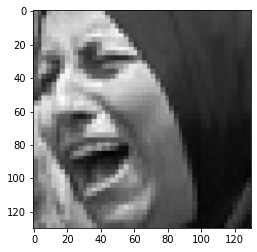

NOT depressed


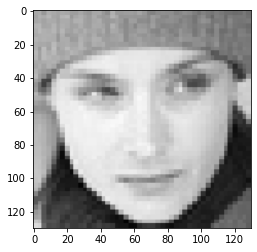

Depressed


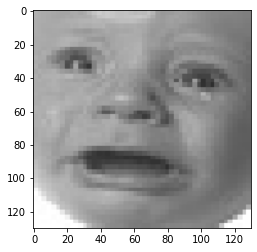

NOT depressed


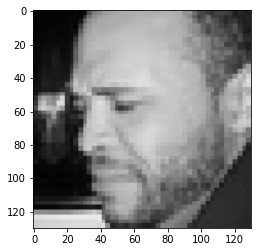

Depressed


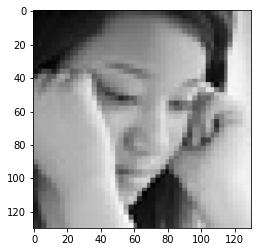

Depressed


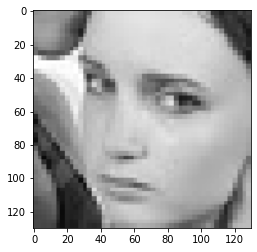

Depressed


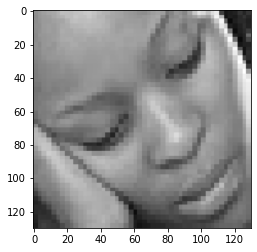

Depressed


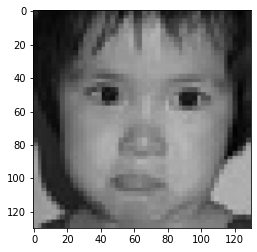

Depressed


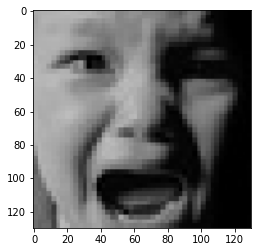

Depressed


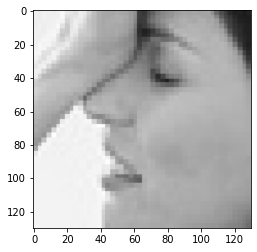

Depressed


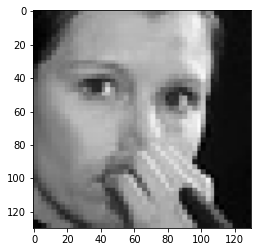

NOT depressed


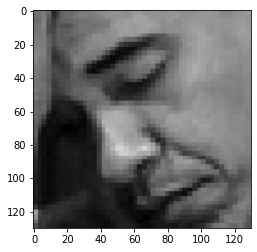

Depressed


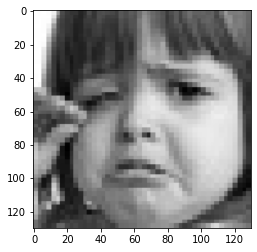

NOT depressed


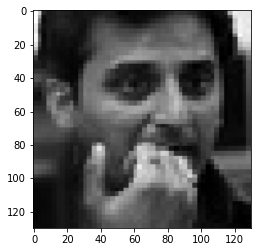

Depressed


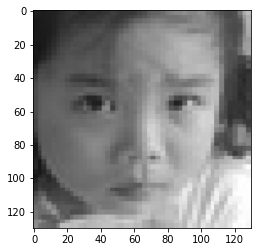

Depressed


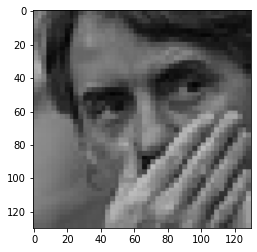

NOT depressed


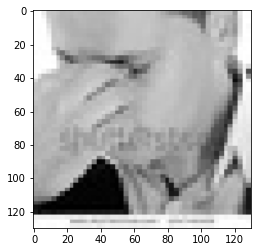

Depressed


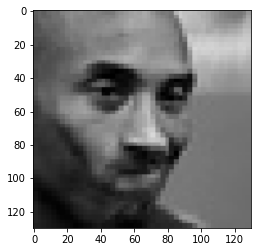

Depressed


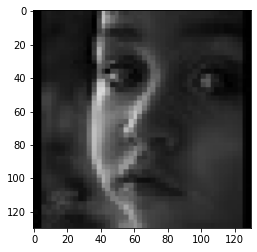

Depressed


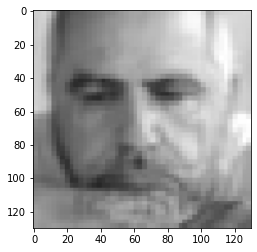

Depressed


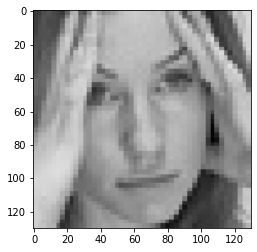

Depressed


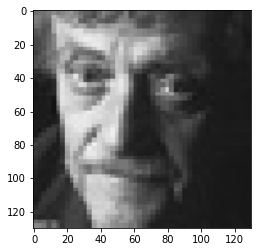

Depressed


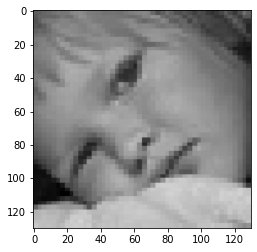

Depressed


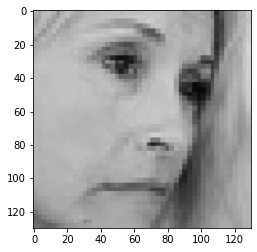

Depressed


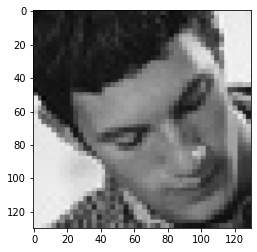

Depressed


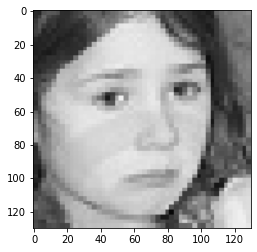

Depressed


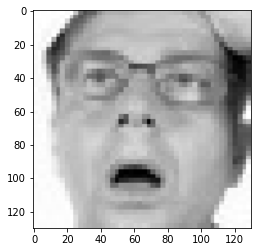

Depressed


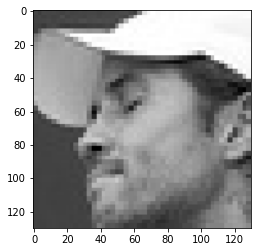

NOT depressed


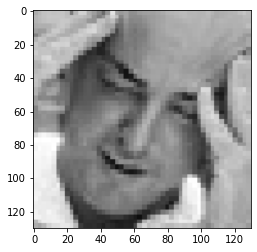

NOT depressed


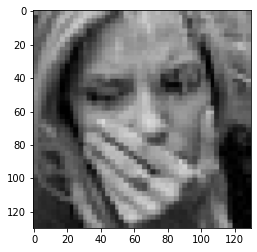

Depressed


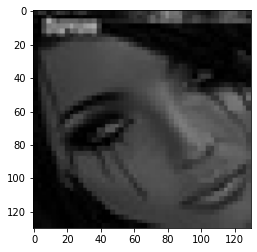

NOT depressed


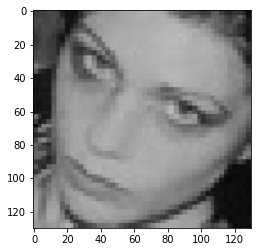

Depressed


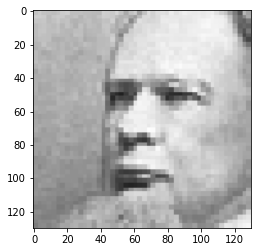

Depressed


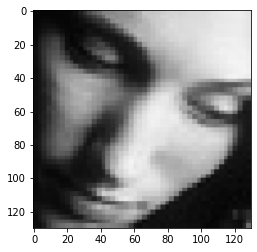

Depressed


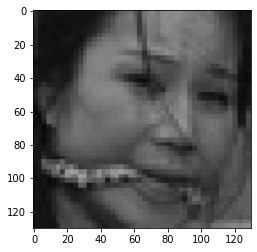

NOT depressed


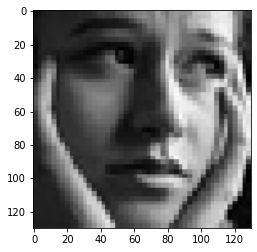

Depressed


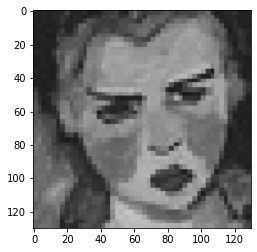

Depressed


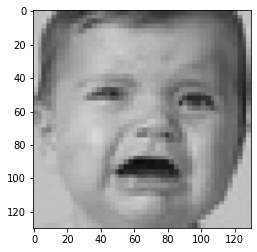

NOT depressed


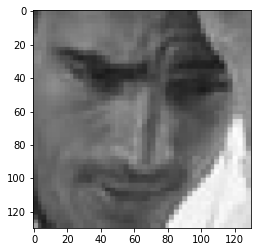

NOT depressed


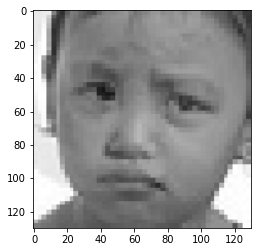

Depressed


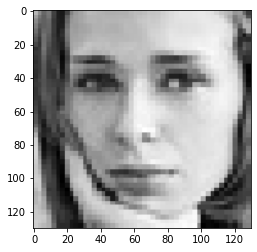

Depressed


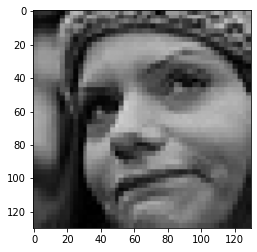

Depressed


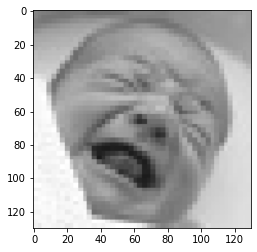

Depressed


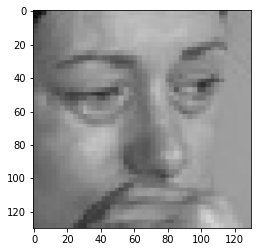

Depressed


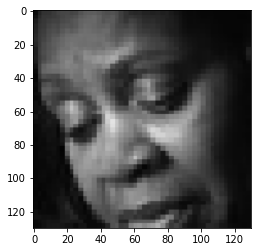

Depressed


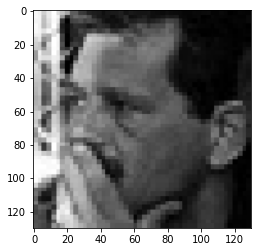

NOT depressed


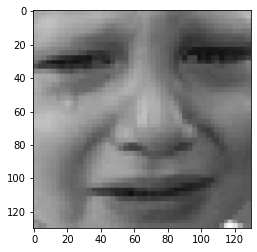

Depressed


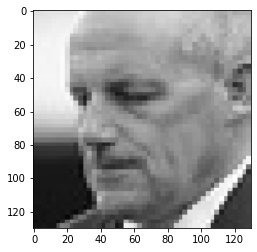

Depressed


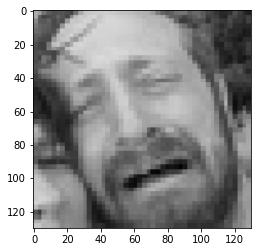

NOT depressed


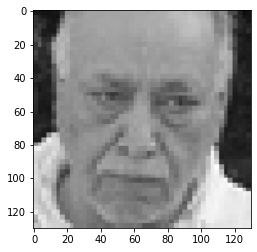

Depressed


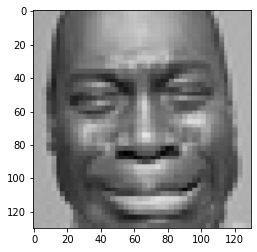

Depressed


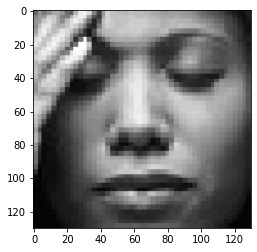

Depressed


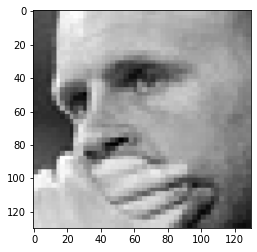

Depressed


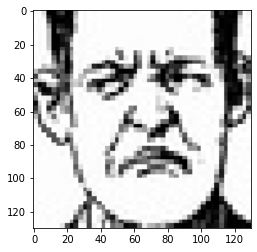

NOT depressed


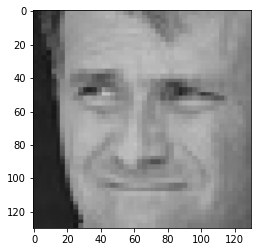

Depressed


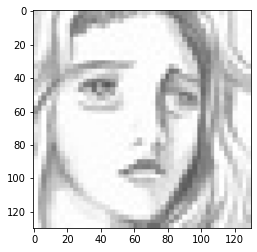

NOT depressed


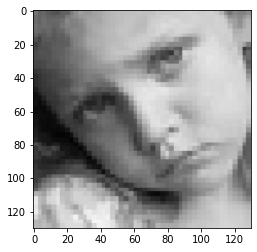

Depressed


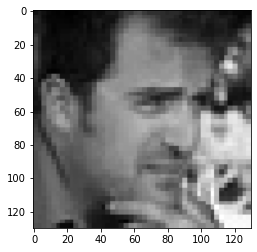

NOT depressed


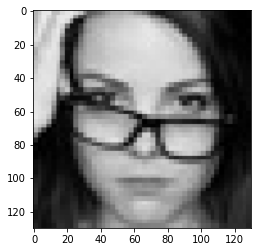

Depressed


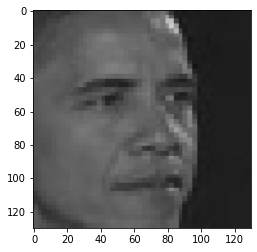

Depressed


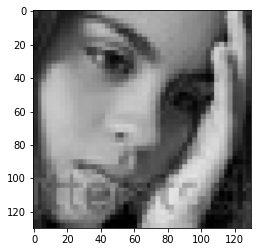

Depressed


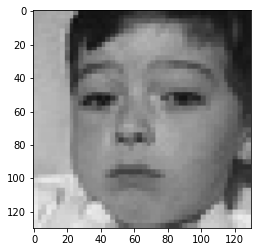

Depressed


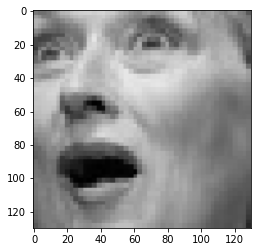

NOT depressed


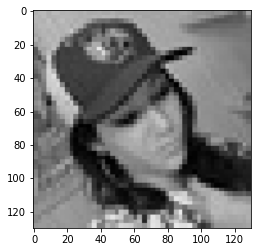

Depressed


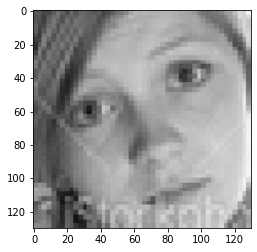

Depressed


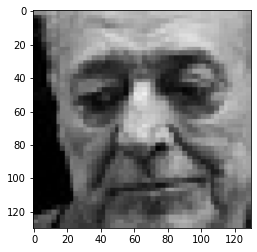

Depressed


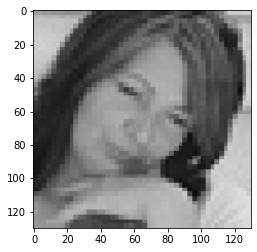

NOT depressed


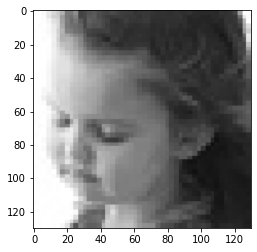

Depressed


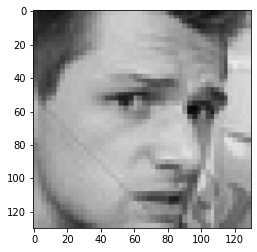

Depressed


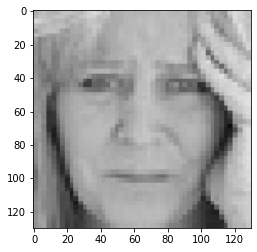

Depressed


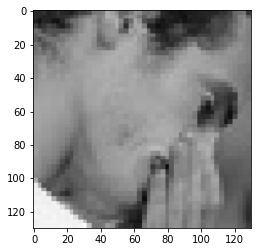

Depressed


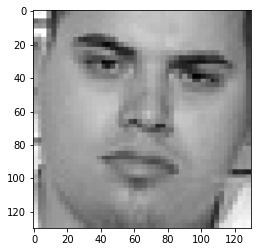

NOT depressed


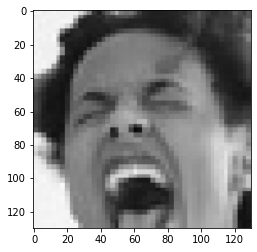

Depressed


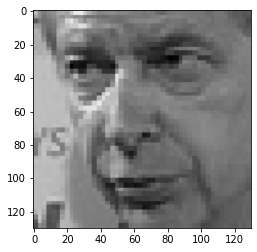

Depressed


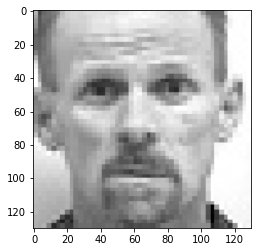

NOT depressed


In [ ]:
dir_path= '/content/drive/MyDrive/Colab Notebooks/test/happy'
for i in os.listdir(dir_path ):
  img=image.load_img(dir_path+'//'+i, target_size=(130,130,3))
  plt.imshow(img)
  plt.show()

  X=image.img_to_array(img)
  X= np.expand_dims(X,axis =0)
  images =np.vstack([X])
  val=model.predict(images)
  if val==1:
    print("Depressed")
  else:
    print("NOT depressed")